<a href="https://colab.research.google.com/github/jaylamichhane81/AI_and_its_application/blob/main/ExamCaliforniaHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California Housing Price Dataset

In [ ]:
#Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df_copy=df #main file ko copy file ma transfer gareko

In [ ]:
df_copy.shape #copy file checking shape(rows and columns)

(20640, 10)

In [ ]:
df_copy.duplicated().sum()# duplicate xa ki nai check gareko

np.int64(0)

In [ ]:
df_copy.dtypes #data ko types check gareko

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [ ]:
df_copy.isnull().sum() #null value check gareko

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
#total_bedrooms ko null value lai fillna le replace gareko with using mean value
df_copy=df_copy.fillna(df_copy['total_bedrooms'].mean())
df_copy.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


#Histogram Plot

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

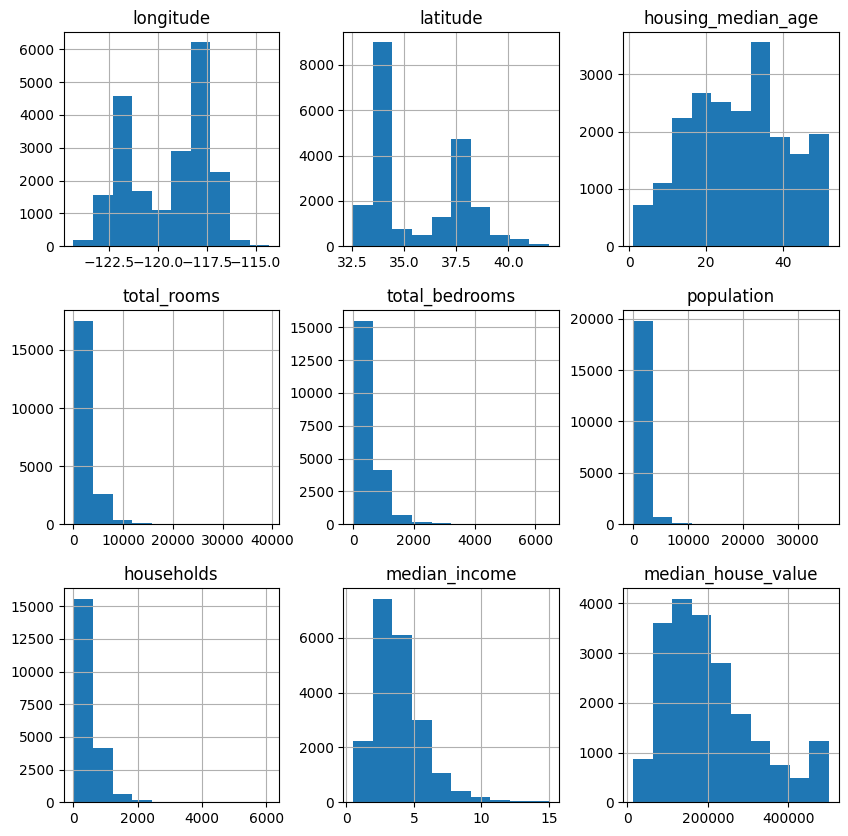

In [ ]:
df_copy.hist(figsize=(10,10))


#longitude and latitude
longitude and latitude
yo graph le California ko kun-kun thauma ghar haru xan vanera dekhauxa.San Francisco ra Los Angeles jasta thauharuma adik data dekhinxa

#housing_median_age
dherai gharharu 35 years vanda old xa 50 years ma dherai data hunule old ghar haru vayeko dekhauxa

#total_rooms and total_bedrooms
dherai block ma kam room haru xan.but kehi blockma dherai xan(outliers)

#population
dherai block ko population kam xa kehi blockma dherai population xan

#households
pratek blockma kati ghardhuri xan vanera dekhauxa dherai jaso block haruma 1000 vanda kam ghardhuri xan .histogram rightside tira lamo bhayekole kehi blockma dherai ghardhuri xan

#median_income
pratek blockko aausat income( 10000)ma measure gariyeko xa dherai peopleko income 60000 vanda kam xa. Histogram rightside tira dhalkeko xa jasle rich area thorai xan vanera dekhauxa

#median_house_value
blockko aausat gharko price dherai gharharu ko price  50000 dekhi 300000 ko bichma xa. 500000 najik dherai data hunu sarkarko price sima bhayeko sanket dinxa

#ocean_proximity
gharko sea najikko kati tada xa dherai jaso ghar <1H OCEAN ma xan.ISLAND ma ghar dherai thorai xan

#Box Plot

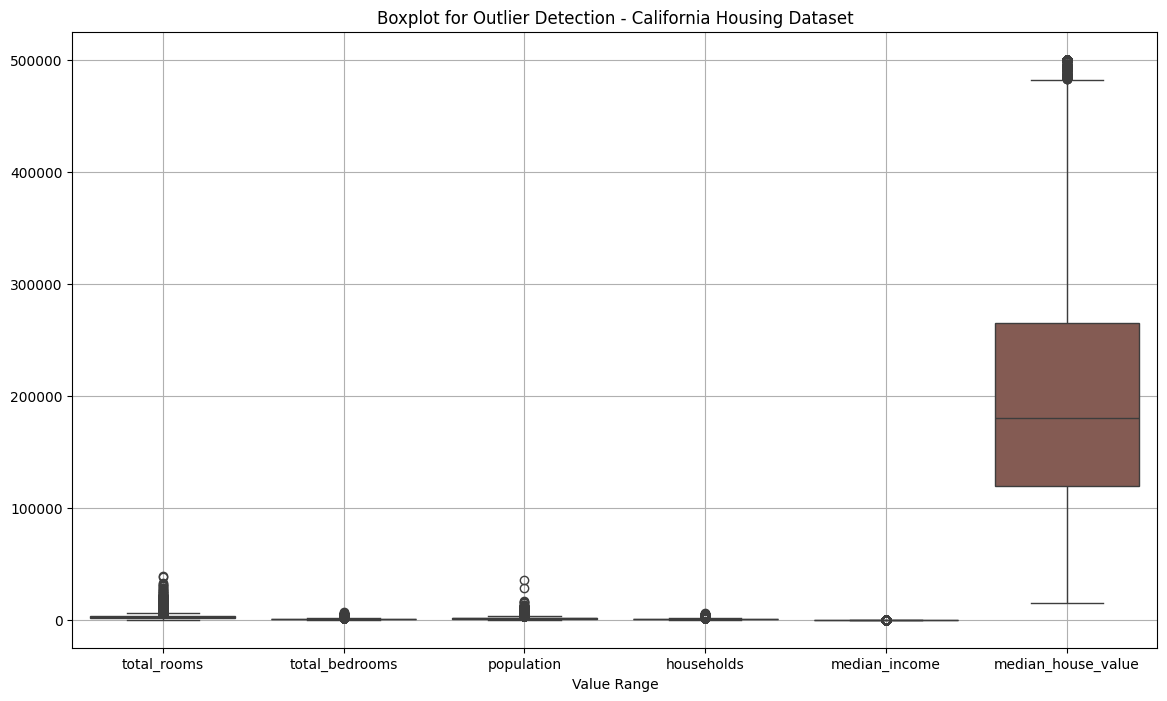

In [ ]:
# Boxplot for numerical columns to detect outliers
plt.figure(figsize=(14, 8))

# Only include numerical columns
numerical_cols = ['total_rooms', 'total_bedrooms', 'population', 'households','median_income','median_house_value'] # Use a list []


# Draw boxplot
sns.boxplot(data=df_copy[numerical_cols])
plt.title("Boxplot for Outlier Detection - California Housing Dataset")
plt.xlabel("Value Range")
plt.grid(True)
plt.show()

#Description

total_rooms, total_bedrooms, population, र households ma dherai outliers xan.
esko matlab kehi gharharu ma dherai room haru ra population haru xan jun normal vanda dherai farak xan.

median_income ra housing_median_age ma kam outliers xan.

median_house_value (target variable) ma pani outliers dekhina sakxa. bishesh gari highest mesaure 500001 najik, jun dataset ma set gariyeko limit ho.



#New Feature Added

In [ ]:
df_copy['rooms_per_household'] = df_copy['total_rooms'] / df_copy['households']
df_copy['bedrooms_per_room'] = df_copy['total_bedrooms'] / df_copy['total_rooms']
df_copy['population_per_household'] = df_copy['population'] / df_copy['households']


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# mapping = {'<1H OCEAN': 1,'INLAND': 2,'NEAR OCEAN': 3,'NEAR BAY':4,'ISLAND':5}
# df_copy['ocean_proximity'] = df_copy['ocean_proximity'].map(mapping)

In [ ]:
 #unique category harulai chinera integers labels ma namakaran garxa jastai 0,1,2,3,4
Le=LabelEncoder()
df_copy['ocean_proximity']=Le.fit_transform(df_copy['ocean_proximity'])
df_copy.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,int64


In [ ]:
df_copy.head(2) #ocean_proximity columns ma integer change vayo ki vayena check gareko

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3


# Removing Outliers Using IQR Method

In [ ]:
col = ['median_income','total_rooms','total_bedrooms','population',
       'latitude','housing_median_age','households','median_house_value']

# IQR Method:
q1 = df_copy[col].quantile(0.25)
q3 = df_copy[col].quantile(0.75)
iqr = q3 - q1


df_copy = df_copy[~((df_copy[col] < (q1 - 1.5 * iqr)) | (df_copy[col] > (q3 + 1.5 * iqr))).any(axis=1)]



In [ ]:
df_copy.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
# Correlation matrix herne
correlation_matrix = df_copy.corr()
print(correlation_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.923399           -0.085494    -0.008899   
latitude            -0.923399  1.000000           -0.013995     0.006740   
housing_median_age  -0.085494 -0.013995            1.000000    -0.295154   
total_rooms         -0.008899  0.006740           -0.295154     1.000000   
total_bedrooms       0.030108 -0.045503           -0.224692     0.880739   
population           0.114419 -0.146016           -0.188023     0.765523   
households           0.027820 -0.066901           -0.197690     0.879393   
median_income       -0.007166 -0.086461           -0.167363     0.279573   
median_house_value  -0.043532 -0.157176            0.097741     0.192084   
ocean_proximity     -0.277099  0.187132            0.103087     0.010222   

                    total_bedrooms  population  households  median_income  \
longitude                 0.030108    0.114419    0.027820      -0.007166   
latitude 

#After Removing Outliers again making histogram plot to check

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

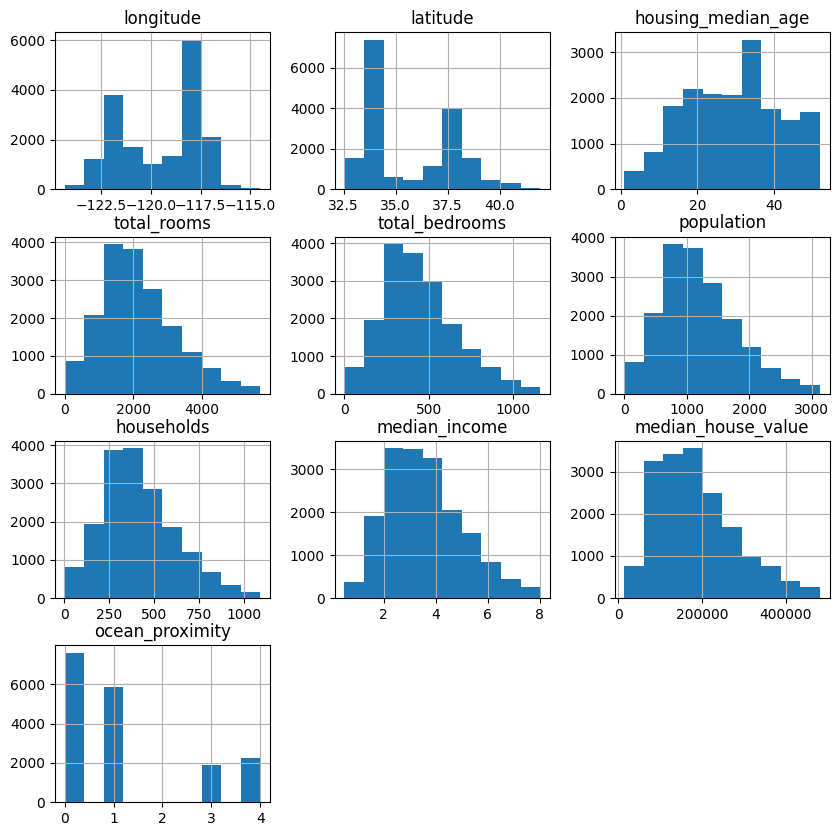

In [ ]:
df_copy.hist(figsize=(10,10))

#HeatMap

In [ ]:
df_copy.isnull().sum().sum()

np.int64(0)

In [ ]:
correlation_matrix = df_copy.corr()
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.923399,-0.085494,-0.008899,0.030108,0.114419,0.027820,-0.007166,-0.043532,-0.277099
latitude,-0.923399,1.000000,-0.013995,0.006740,-0.045503,-0.146016,-0.066901,-0.086461,-0.157176,0.187132
housing_median_age,-0.085494,-0.013995,1.000000,-0.295154,-0.224692,-0.188023,-0.197690,-0.167363,0.097741,0.103087
total_rooms,-0.008899,0.006740,-0.295154,1.000000,0.880739,0.765523,0.879393,0.279573,0.192084,0.010222
total_bedrooms,0.030108,-0.045503,-0.224692,0.880739,1.000000,0.815114,0.964341,-0.028406,0.091364,0.026554
population,0.114419,-0.146016,-0.188023,0.765523,0.815114,1.000000,0.861417,-0.000437,-0.011466,-0.083527
households,0.027820,-0.066901,-0.197690,0.879393,0.964341,0.861417,1.000000,0.015433,0.120424,0.017994
median_income,-0.007166,-0.086461,-0.167363,0.279573,-0.028406,-0.000437,0.015433,1.000000,0.629247,-0.045420
median_house_value,-0.043532,-0.157176,0.097741,0.192084,0.091364,-0.011466,0.120424,0.629247,1.000000,0.067552
ocean_proximity,-0.277099,0.187132,0.103087,0.010222,0.026554,-0.083527,0.017994,-0.045420,0.067552,1.000000


<Axes: >

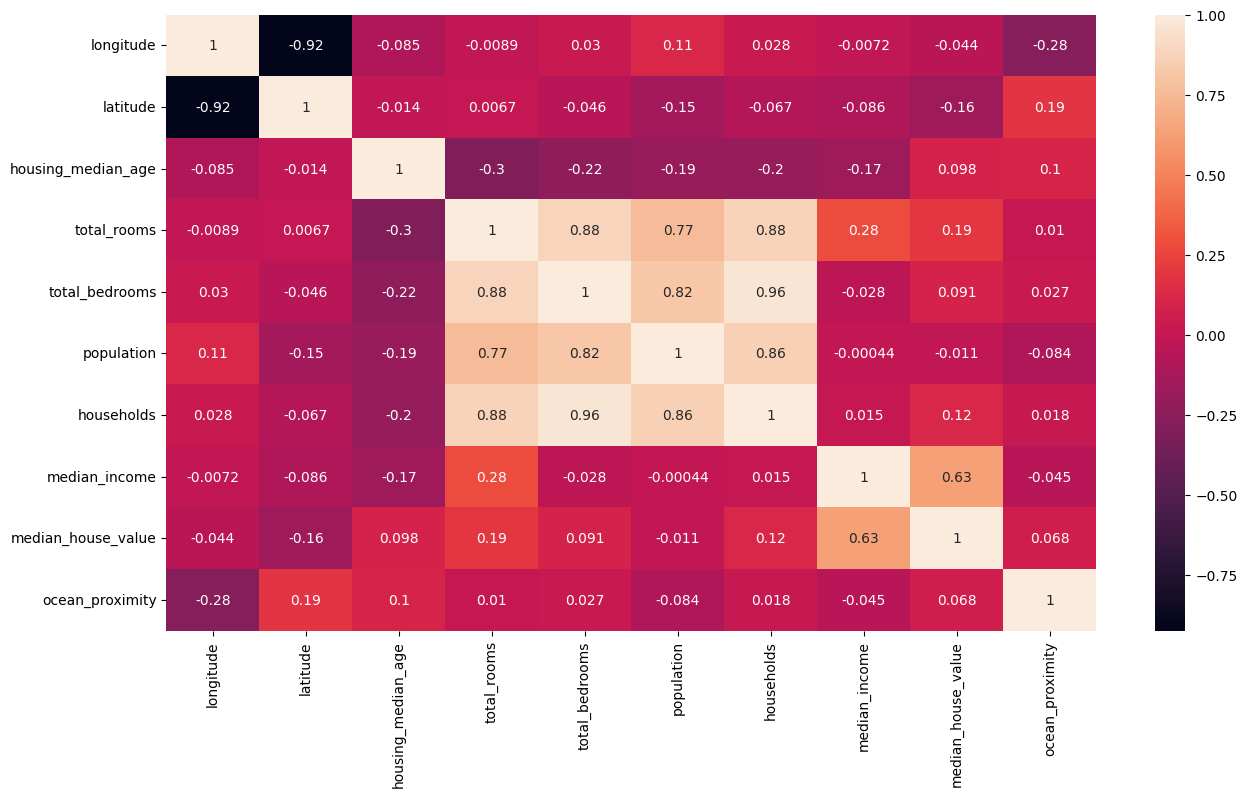

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_copy.corr(), annot=True)

#Description
median_income feature chai strongest predictor vayo house price increase hunalai


Geographical features like latitude and ocean_proximity le halka prices ma decrease aauxa

total_rooms, total_bedrooms, and households are highly correlated and may be redundant.

population and housing_median_age have little to no impact on price prediction alone.



#Feature and Target Split

In [ ]:
X = df_copy.drop('median_house_value', axis=1)
y=df_copy['median_house_value']

#Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
lr.predict(X_test_scaled)

array([121498.44812621, 249600.75238252, 235079.88811963, ...,
       100812.2912921 , 238908.51017927, 190990.12558898])

In [ ]:
lr.score(X_test_scaled,y_test)

0.6096803211428531

# Prediction and Evaluation in Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"R^2 Score: {r2:.3f}")


Mean Squared Error: 3571032573.183
Root Mean Squared Error: 59758.117
R^2 Score: 0.610


# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Rfr=RandomForestRegressor()

In [ ]:
Rfr.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [ ]:
Rfr.score(X_test_scaled,y_test)

0.7849448377463224

#Prediction and Evaluation in Random Forest Regressor

In [ ]:
y_pred = Rfr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"R^2 Score: {r2:.3f}")

Mean Squared Error: 1967538484.576
Root Mean Squared Error: 44356.944
R^2 Score: 0.785


# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
Dtr=DecisionTreeRegressor()

In [ ]:
Dtr.fit(X_train_scaled,y_train)

DecisionTreeRegressor()

In [ ]:
Dtr.score(X_test_scaled,y_test)

0.5757051808831551

#Prediction and Evaluation in Decision Tree Regressor

In [ ]:
y_pred = Dtr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"R^2 Score: {r2:.3f}")

Mean Squared Error: 3881870942.647
Root Mean Squared Error: 62304.662
R^2 Score: 0.576


# Actual vs Predicted Plot

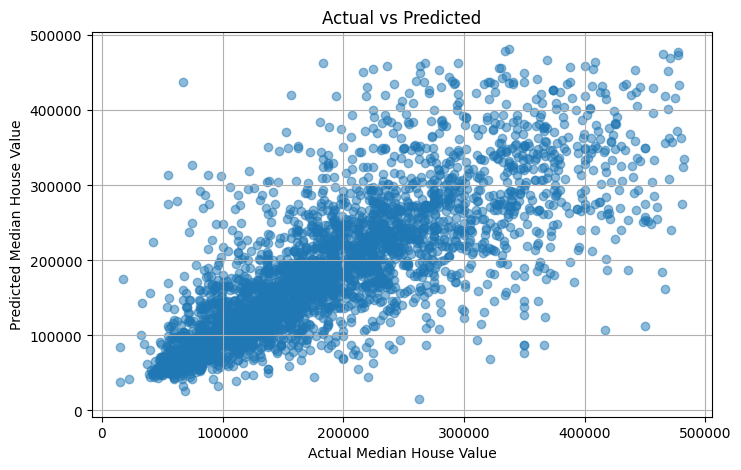

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


In [ ]:
comparision_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
comparision_df

,Actual,Predicted
3299,58800.0,116700.0
113,224100.0,228100.0
11323,187500.0,173100.0
2140,70400.0,70800.0
11836,148000.0,88800.0
...,...,...
3949,227100.0,229200.0
13294,130400.0,106700.0
14254,87900.0,78500.0
14366,263800.0,164400.0
